In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df = pd.read_csv("Travel.csv")

In [159]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

## 1. What is the distribution of customerages, and how does age relate to product purchase

In [161]:
df.loc[:,"ProdTaken" : "Age"].head()  # we have null values in age , so let's impute null values by mean of the ages

,ProdTaken,Age
0,1,41.0
1,0,49.0
2,1,37.0
3,0,33.0
4,0,NaN


In [162]:
df['Age'].isnull().sum()   # So we have 226 null values

226

In [163]:
# Filling null values
df["Age"].fillna(value = df["Age"].mean(), inplace = True)

In [164]:
# Dividing age-group
bins = list(range(18, 62, 5))
labels = ['18-22 years', '23-27 years', '28-32 years', '33-37 years', '38-42 years', '43-47 years', '48-52 years', '53-57 years']


df["ageGrp"] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [165]:
ageBins = range(18, 62, 5)

# Use cut method to categorize age into bins
df['ageGrp'] = pd.cut(df['Age'], bins=ageBins)

# Group by age bins and calculate the sum of 'ProdTaken'
prod_taken_by_age = df.groupby('ageGrp')['ProdTaken'].sum().reset_index()

In [166]:
df1 = df.groupby("ageGrp")["ProdTaken"].sum()

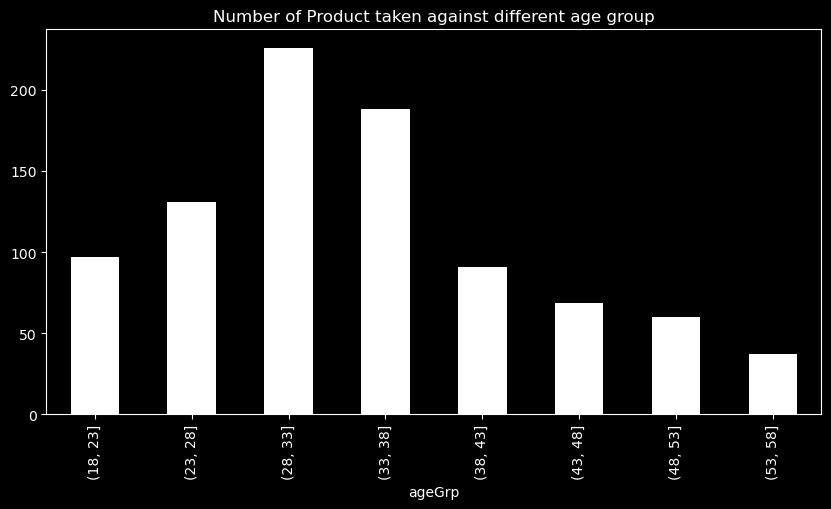

In [167]:
plt.style.use("dark_background")
plt.figure(figsize = (10, 5))
df1.plot(kind='bar',color="white")
plt.title("Number of Product taken against different age group")
plt.show()

In [168]:
df1

ageGrp
(18, 23]     97
(23, 28]    131
(28, 33]    226
(33, 38]    188
(38, 43]     91
(43, 48]     69
(48, 53]     60
(53, 58]     37
Name: ProdTaken, dtype: int64

### Answer - 1

From visual data and from data frame name df1, we can see that , the age group between 28 - 33 are purchasing more product.
So we can conclude that middle aged people have more purchasing power. As age is increasing we can witness the decrease in product purchase. 
If we see the graph carefully than we can see the distribution approximate follows the normal or Gaussian distribution.

<br>

## 2. How does the type of contact(type of contact)influence the likelihood of purchasing a travel product? 

In [169]:
pd.crosstab(df["ProdTaken"], df["TypeofContact"])

TypeofContact,Company Invited,Self Enquiry
ProdTaken,,
0,1109,2837
1,310,607


In [170]:
df["TypeofContact"].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [171]:
df["TypeofContact"].unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

## 3. Is there a correlation between the city tier(citytier)and monthly income (monthly income) of customers?

In [203]:
print(df["CityTier"].isnull().count(), df["MonthlyIncome"].isnull().sum()) # so null values in monthly income

4888 0


In [173]:
# Filling null values
df["MonthlyIncome"].fillna(value = df["MonthlyIncome"].mean(), inplace = True)

<Axes: xlabel='MonthlyIncome', ylabel='CityTier'>

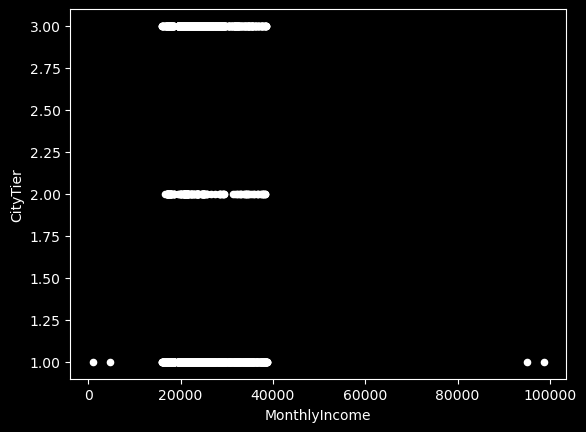

In [239]:
df.plot(kind = "scatter", y = "CityTier", x = "MonthlyIncome", color = "white")

As we can see there is no direct correlation between city tier and Monthly income. The scatter plot is straight line, means that the coefficient of correlation is 0. 

In [175]:
df2 = df.groupby("CityTier")["MonthlyIncome"].sum()
df2

CityTier
1    7.473703e+07
2    4.706166e+06
3    3.601065e+07
Name: MonthlyIncome, dtype: float64

### Answer - 2

As by grouping data we can see that tier-1 city has highest monthly income, but we can also see that there is no decreasing relation, instead it has minima for tier-2 city and then again it is increasing. And we can see that by following graph:

<Axes: xlabel='CityTier'>

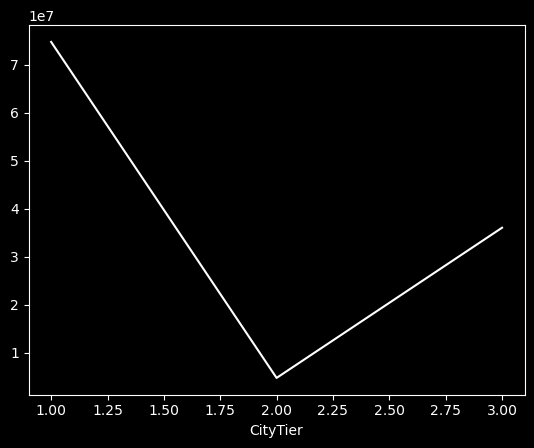

In [240]:
df2.plot(kind='line', color = "white")

## 4. What is the average duration of a pitch (duration of pitch)for customers who purchased a product versus those who did not?

In [177]:
df3 = df.groupby("ProdTaken")["DurationOfPitch"].mean()
df3.index = ["Product Not Purchased", "Product Purchased"]

In [178]:
df3

Product Not Purchased    15.169325
Product Purchased        16.873143
Name: DurationOfPitch, dtype: float64

## 5. How do occupation types(occupation)distribute among customers,and is there an occupation type that is more likely to purchase a travel product? 

In [179]:
# Distribution of types of occupation among customers
df3 = df["Occupation"].value_counts()
df3

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

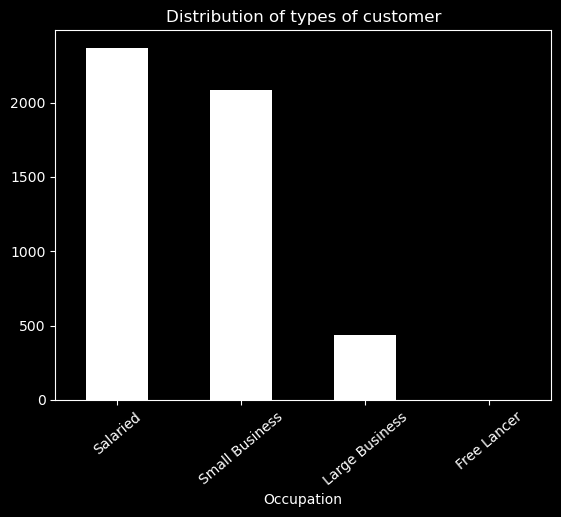

In [180]:
df3.plot(kind="bar", rot=40, color = "white")
plt.title("Distribution of types of customer")
plt.show()

### Answer - 5.1

From graph and by above summarise data in data frame df3, we can clearly say that highest type of occupation from cutomer is salaried type and then small business and free lancers are least.

In [181]:
# Occupation type vs Product purchase
df4 = df.groupby("Occupation")["ProdTaken"].sum()
df4

Occupation
Free Lancer         2
Large Business    120
Salaried          414
Small Business    384
Name: ProdTaken, dtype: int64

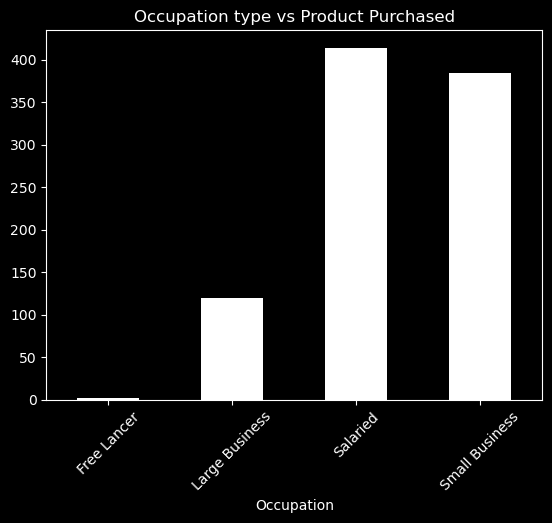

In [242]:
df4.plot(kind="bar", rot=45, color = "white")
plt.title("Occupation type vs Product Purchased")
plt.show()

### Answer- 5.2

Salaried person are more inclined towards product purchasing.

## 6. Are there any gender-based preferences for the type of product pitched (ProductPitched)? 

In [183]:
df["ProductPitched"].unique()  # so we have 5 types in product pitched

array(['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

In [184]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female', regex = False)

In [185]:
df["Gender"].unique()  # "Fe male" is Female

array(['Female', 'Male'], dtype=object)

In [186]:
df.groupby([ 'ProductPitched' , 'Gender']).size().unstack(fill_value = 0)

Gender,Female,Male
ProductPitched,,
Basic,680,1162
Deluxe,724,1008
King,82,148
Standard,326,416
Super Deluxe,160,182


### Answer - 6


From above data we can see there is strong gender based preference for Basic and Deluxe, male customers are more inclined towards these product.

## 7. Does having a passport(passport)correlate with a higher number of trips taken or a higher likelihood of purchasing a travel product?

In [187]:
print(df["Passport"].value_counts(), "\n",df["NumberOfTrips"].value_counts())

Passport
0    3466
1    1422
Name: count, dtype: int64 
 NumberOfTrips
2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
19.0       1
21.0       1
20.0       1
22.0       1
Name: count, dtype: int64


In [188]:
df.groupby("Passport")["NumberOfTrips"].sum()

Passport
0    10836.0
1     4531.0
Name: NumberOfTrips, dtype: float64

In [189]:
df.groupby("Passport")["ProdTaken"].sum()

Passport
0    426
1    494
Name: ProdTaken, dtype: int64

### Answer - 7


As we can see that having passport does not convey that they are travelling more than those who does not have passport. And purchasing travel product is almost same for both the customer who have passport with those who does not have passport.

## 8. How satisfied are customers with the pitch (pitch satisfaction score),and does this satisfaction influence product purchase?

In [190]:
Satisfaction = df["PitchSatisfactionScore"].value_counts().sort_index()
Satisfaction

PitchSatisfactionScore
1     942
2     586
3    1478
4     912
5     970
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Pitch Satidfaction Score')

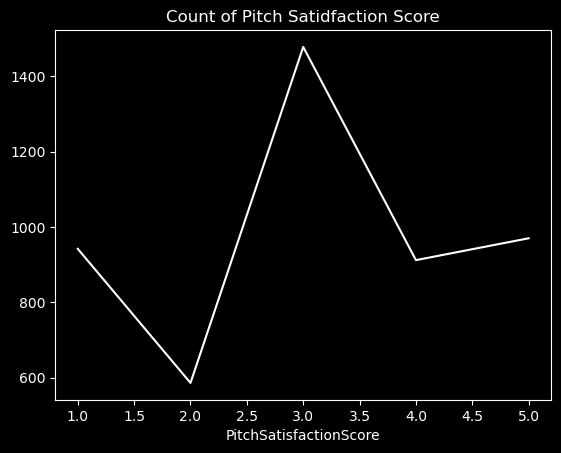

In [243]:
Satisfaction.plot(kind = "line" , color = "white")
plt.title("Count of Pitch Satidfaction Score")

### Answer - 8

As from above visual and from above summarised data, we can say that most cutomers have given 3 rating. So number of customer giving rating from 1 to 3 is increasing and then decreasing. So all customers are averagely satisfied by the pitch. But we can also see that the number of customer giving 1 rating as same as that of number of customer giving 5 star.

## 9. Among customers with children (number of children visiting), how does the number of children impact travel product purchases ?

In [192]:
df["NumberOfChildrenVisiting"].isnull().sum()  # so we have 66 null values, we have tom impute these values

66

In [193]:
df["NumberOfChildrenVisiting"].describe()  # as we can see average is 1.18 ~ 1, so we can impute the value by 1

count    4822.000000
mean        1.187267
std         0.857861
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: NumberOfChildrenVisiting, dtype: float64

In [194]:
# filling null values with 1
df["NumberOfChildrenVisiting"].fillna(value = int(df["NumberOfChildrenVisiting"].mean()), inplace = True)

In [195]:
df.groupby("NumberOfChildrenVisiting")["ProdTaken"].sum()

NumberOfChildrenVisiting
0.0    202
1.0    399
2.0    253
3.0     66
Name: ProdTaken, dtype: int64

### Answer - 9

The more children are there the product purchase is decreased. So the number of children are directly impacting the product purchase. We can see that with 1 children there is more product purchase but with 3 children  the product purchased is significatly low compared to other.

## 10. Gender preferences for product types: how does gender influence the preference for different types of travel products pitched (product pitched)?

In [196]:
df.groupby([ 'ProductPitched' , 'Gender']).size().unstack(fill_value = 0)

Gender,Female,Male
ProductPitched,,
Basic,680,1162
Deluxe,724,1008
King,82,148
Standard,326,416
Super Deluxe,160,182


### Answer - 10

As we can see that the male customers are purchasing more product than female. And male prefer Basic package while female prefer Deluxe package.

## 11. Impact of marital status on travel preferences: does marital status affect the choice of travel product, and if so, how do different marital statuses correlate with product purchases (prod taken)?

In [197]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ageGrp'],
      dtype='object')

In [198]:
df6 = df.groupby([ 'ProductPitched' , 'MaritalStatus']).size().unstack(fill_value = 0)
df6

MaritalStatus,Divorced,Married,Single,Unmarried
ProductPitched,,,,
Basic,332,816,511,183
Deluxe,336,852,221,323
King,52,126,52,0
Standard,142,380,50,170
Super Deluxe,88,166,82,6


Text(0.5, 1.0, 'Marital Status against Product Pitched')

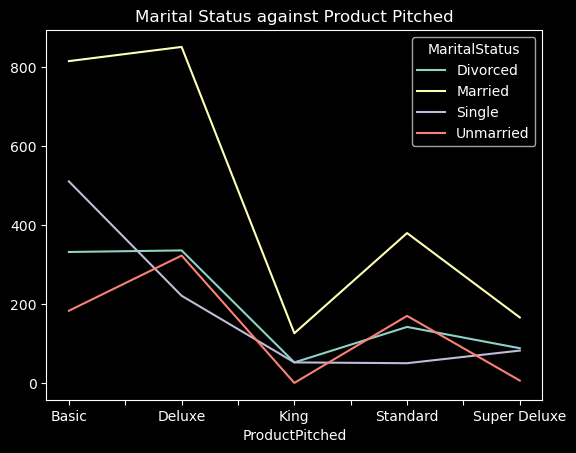

In [199]:
df6.plot()
plt.title("Marital Status against Product Pitched")

### Answer - 11

It is evident from data that married status has strong influence towards type of product purchased. 

## 12. Relationship between number of children and travel product interest: how does the number of children visiting (number of children visiting) impact the likelihood of purchasing a travel product?

Same as 9th question

## 13. Influence of owning a car on travel decisions: is there a correlation between owning a car (own car) and the number of trips taken (number of trips) or the type of travel product purchased?

In [200]:
# Number of trips vs Product Purchased 
df.groupby("OwnCar")["ProdTaken"].sum()

OwnCar
0    360
1    560
Name: ProdTaken, dtype: int64

In [201]:
# Number of trips vs Car owners
df.groupby("OwnCar")["NumberOfTrips"].sum()

OwnCar
0    5915.0
1    9452.0
Name: NumberOfTrips, dtype: float64

### Answer - 13

From above data, we can see that customer who own car has travelled more times that of those who don't own car. And also car owner has bought more product than non-car owner.

## 14. Income level and product choice: how does the monthly income (monthly income) of customers influence their choice of travel products, and is there a preferred product for different income levels? 

In [205]:
df["MonthlyIncome"].describe()  # for better analysis we should make bins of monthly income 

count     4888.000000
mean     23619.853491
std       5250.862747
min       1000.000000
25%      20485.000000
50%      22655.000000
75%      25424.750000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [217]:
incomeBins = range(1000, 110000, 10000)

# Use cut method to categorize age into bins
df['incomeBin'] = pd.cut(df['MonthlyIncome'], bins = incomeBins)

In [222]:
df.groupby(["incomeBin", "ProductPitched"]).size().unstack()

ProductPitched,Basic,Deluxe,King,Standard,Super Deluxe
incomeBin,,,,,
"(1000, 11000]",0,1,0,0,0
"(11000, 21000]",1059,456,1,10,1
"(21000, 31000]",768,1265,1,692,89
"(31000, 41000]",13,9,228,40,252
"(41000, 51000]",0,0,0,0,0
"(51000, 61000]",0,0,0,0,0
"(61000, 71000]",0,0,0,0,0
"(71000, 81000]",0,0,0,0,0
"(81000, 91000]",0,0,0,0,0


### Answer - 14

From the above data we can see that the income level between 11000 to 21000 prefer Basic package. And that of higher side between 21000 to 31000 , Deluxe is more favourable choice. And we don't have much data for income greater than 41000. So basic and deluxe are more favourable choice for average average income.

# <i>Thank you</i>